In [1]:
# EDA e Visualização de dados
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px


# Machine Learning
from sklearn.cluster import AgglomerativeClustering, BisectingKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

# Otimização
import optuna



### Carregar Dados

In [2]:
# Carregar dataframe
df_laptops = pd.read_csv('./dataset/laptops_new.csv')

In [41]:
# Analisar estrutura do dataframe
df_laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     991 non-null    int64  
 1   brand                     991 non-null    object 
 2   model                     991 non-null    object 
 3   price                     991 non-null    float64
 4   rating                    991 non-null    int64  
 5   processor_brand           991 non-null    object 
 6   processor_tier            991 non-null    object 
 7   num_cores                 991 non-null    int64  
 8   num_threads               991 non-null    int64  
 9   ram_memory                991 non-null    int64  
 10  primary_storage_type      991 non-null    object 
 11  primary_storage_capacity  991 non-null    int64  
 12  gpu_brand                 991 non-null    object 
 13  gpu_type                  991 non-null    object 
 14  is_touch_s

In [42]:
# Visualizar dados
df_laptops.head(10)

,index,brand,model,price,rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,primary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,os,year_of_warranty,cluster
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,287.72,63,intel,core i3,2,4,8,...,512,intel,integrated,0,15.6,1920,1080,windows,1,73
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,431.64,67,intel,core i7,4,8,16,...,1024,intel,integrated,0,15.6,1920,1080,windows,1,44
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,612.86,73,amd,ryzen 5,6,12,8,...,512,amd,dedicated,0,15.6,1920,1080,windows,1,28
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,479.62,62,intel,core i5,12,16,8,...,512,intel,integrated,0,14.0,1920,1080,windows,1,53
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,342.77,62,amd,ryzen 3,4,8,8,...,512,amd,integrated,0,15.6,1920,1080,windows,1,14
5,6,apple,Apple MacBook Air 2020 MGND3HN Laptop (Apple M...,851.41,45,apple,m1,8,8,8,...,256,apple,apple,0,13.3,2560,1600,mac,1,113
6,7,infinix,Infinix INBook Y2 Plus Laptop (11th Gen Core i...,419.65,56,intel,core i5,4,8,16,...,512,intel,integrated,0,15.6,1920,1080,windows,1,4
7,8,asus,Asus TUF Gaming F15 FX506HF-HN024W Gaming Lapt...,599.55,70,intel,core i5,6,12,8,...,512,nvidia,dedicated,0,15.6,1920,1080,windows,1,19
8,9,hp,HP 15s-fq5007TU Laptop (12th Gen Core i3/ 8GB/...,443.64,60,intel,core i3,6,8,8,...,512,intel,integrated,0,15.6,1920,1080,windows,1,95
9,10,infinix,Infinix Zerobook 2023 Laptop (13th Gen Core i9...,719.48,71,intel,core i9,14,20,32,...,1024,intel,integrated,0,15.6,1920,1080,windows,1,83


In [43]:
df_laptops.tail(10)

,index,brand,model,price,rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,primary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,os,year_of_warranty,cluster
981,993,msi,MSI Katana 15 B13VFK-296IN Gaming Laptop (13th...,1439.09,76,intel,core i7,10,16,16,...,1024,nvidia,dedicated,0,15.6,1920,1080,windows,2,21
982,994,asus,Asus Zenbook 14 OLED 2023 UM3402YA-KM551WS Lap...,935.36,68,amd,ryzen 5,6,12,16,...,1024,amd,integrated,0,14.0,2880,1800,windows,1,86
983,995,asus,Asus Vivobook 16 2023 M1605YA-MB551WS Laptop (...,803.44,65,amd,ryzen 5,6,12,16,...,1024,amd,integrated,0,16.0,1920,1200,windows,1,116
984,996,asus,Asus Vivobook 16 2023 M1605YA-MB541WS Laptop (...,719.48,64,amd,ryzen 5,6,12,16,...,512,amd,integrated,0,16.0,1920,1200,windows,1,37
985,997,acer,Acer Nitro 5 AN515-47 NH.QL3SI.003 Gaming Lapt...,905.50,67,amd,ryzen 7,8,16,8,...,512,nvidia,dedicated,0,15.6,1920,1080,windows,1,11
986,998,asus,Asus Vivobook Pro 15 M6500QC-HN542WS Laptop (R...,791.44,68,amd,ryzen 5,6,12,16,...,512,nvidia,dedicated,0,15.6,1920,1080,windows,1,85
987,999,msi,MSI Thin GF63 12VE-070IN Gaming Laptop (12th G...,1103.27,73,intel,core i7,10,16,16,...,512,nvidia,dedicated,0,15.6,1920,1080,windows,2,7
988,1000,asus,Asus Vivobook Go 15 2023 E1504FA-NJ522WS Lapto...,539.58,59,amd,ryzen 5,4,8,8,...,512,amd,integrated,0,15.6,1920,1080,windows,1,64
989,1001,asus,Asus Zenbook 14 2023 UM3402YA-KP541WS Laptop (...,815.43,68,amd,ryzen 5,6,12,16,...,512,amd,integrated,0,14.0,2560,1600,windows,1,115
990,1002,hp,HP Chromebook 15a-na0008TU Laptop (Intel Celer...,251.74,37,intel,celeron,2,2,4,...,128,intel,integrated,0,15.6,1366,768,chrome,1,36


### EDA

In [6]:
# Estatísticas das variáveis
df_laptops.describe()

,index,price,rating,num_cores,num_threads,ram_memory,primary_storage_capacity,display_size,resolution_width,resolution_height
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,505.860747,926.687487,63.931382,8.128153,12.191726,13.047427,610.938446,15.171241,2003.503532,1181.227043
std,287.899458,688.239764,10.190575,4.215499,5.585115,5.591188,266.927666,0.938089,361.965292,263.884019
min,1.000000,117.540000,24.000000,2.000000,0.000000,2.000000,32.000000,10.100000,1080.000000,768.000000
25%,258.500000,522.850000,58.000000,6.000000,8.000000,8.000000,512.000000,14.000000,1920.000000,1080.000000
50%,507.000000,742.390000,64.000000,8.000000,12.000000,16.000000,512.000000,15.600000,1920.000000,1080.000000
75%,754.500000,1070.350000,71.000000,10.000000,16.000000,16.000000,512.000000,15.600000,1920.000000,1200.000000
max,1002.000000,5450.880000,89.000000,24.000000,32.000000,36.000000,2048.000000,18.000000,3840.000000,2560.000000


In [7]:
# Checar variável year_of_warranty
df_laptops['year_of_warranty'].unique()

array(['1', '2', 'No information', '3'], dtype=object)

In [8]:
# Ajustar variável year_of_warranty
df_laptops.loc[df_laptops['year_of_warranty'] == 'No information', 'year_of_warranty'] = 1
df_laptops['year_of_warranty'] = df_laptops['year_of_warranty'].astype(int)

In [9]:
# Transformar variável booleana em int (is_touch_screen)
df_laptops['is_touch_screen'] = df_laptops['is_touch_screen'].astype(int)

In [10]:
# Distribuição da variável brand
percentual_brand = df_laptops.value_counts('brand') / len(df_laptops) * 100
px.bar(percentual_brand, color=percentual_brand.index)

In [11]:
# Distribuição da variável processor_brand
percentual_processor_brand = df_laptops.value_counts('processor_brand') / len(df_laptops) * 100
px.bar(percentual_processor_brand, color=percentual_processor_brand.index)

<Axes: xlabel='price', ylabel='Count'>

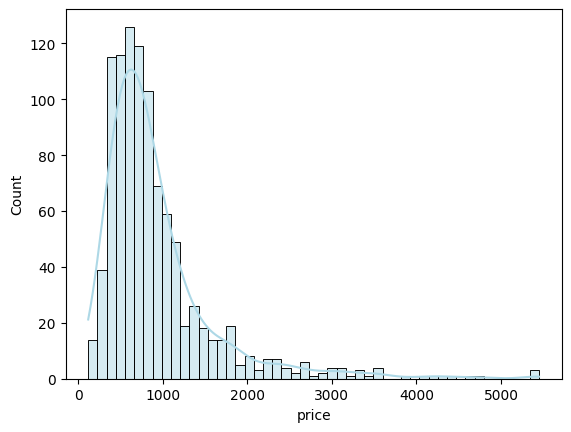

In [12]:
# Distribuição da variável price
sns.histplot(df_laptops['price'], kde=True, color='lightblue')

<Axes: xlabel='rating', ylabel='Count'>

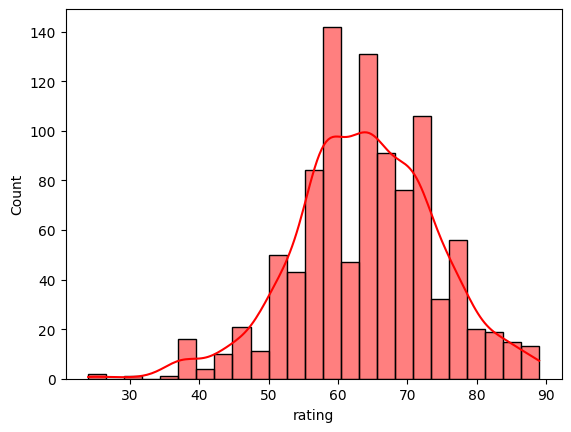

In [13]:
# Distribuição da variável rating
sns.histplot(df_laptops['rating'], kde=True, color='red')

In [14]:
# Plot de distribuição por Brand e Price
px.box(df_laptops, x='price', y='brand', color='brand', orientation='h')

In [15]:
# Plot de distribuição por Brand e Rating
px.box(df_laptops, x='rating', y='brand', color='brand', orientation='h')

In [16]:
# Scatterplot de Price e Rating
px.scatter(df_laptops, x='price', y='rating', color='brand')

### Treinar modelos de clustering hierarquico

In [17]:
# Selecionar colunas para clusterização
X = df_laptops.copy()

# Remover colunas desnecessárias
X.drop(columns=['index', 'model'], axis=1, inplace=True)

In [18]:
X

,brand,price,rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,primary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,os,year_of_warranty
0,tecno,287.72,63,intel,core i3,2,4,8,SSD,512,intel,integrated,0,15.6,1920,1080,windows,1
1,tecno,431.64,67,intel,core i7,4,8,16,SSD,1024,intel,integrated,0,15.6,1920,1080,windows,1
2,hp,612.86,73,amd,ryzen 5,6,12,8,SSD,512,amd,dedicated,0,15.6,1920,1080,windows,1
3,acer,479.62,62,intel,core i5,12,16,8,SSD,512,intel,integrated,0,14.0,1920,1080,windows,1
4,lenovo,342.77,62,amd,ryzen 3,4,8,8,SSD,512,amd,integrated,0,15.6,1920,1080,windows,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,asus,791.44,68,amd,ryzen 5,6,12,16,SSD,512,nvidia,dedicated,0,15.6,1920,1080,windows,1
987,msi,1103.27,73,intel,core i7,10,16,16,SSD,512,nvidia,dedicated,0,15.6,1920,1080,windows,2
988,asus,539.58,59,amd,ryzen 5,4,8,8,SSD,512,amd,integrated,0,15.6,1920,1080,windows,1
989,asus,815.43,68,amd,ryzen 5,6,12,16,SSD,512,amd,integrated,0,14.0,2560,1600,windows,1


In [ ]:
# Separar variáveis numéricas e categóricas
numeric_features = ['price', 'rating', 'num_cores', 'num_threads', 'ram_memory', 'primary_storage_capacity',
                    'display_size', 'resolution_width', 'resolution_height']
categorical_features = ['brand', 'processor_brand', 'gpu_brand', 'gpu_type', 'os']                        

In [20]:
# Aplicar transformação de dados
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

In [21]:
# Criar pré-processador de transformação
preprocessor= ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
    
)

In [22]:
# Transformar os dados
X_transformed = preprocessor.fit_transform(X)

In [ ]:
# Visualizar X_transformed
X_transformed

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 13874 stored elements and shape (991, 54)>

In [ ]:
def hierarchical_aglomerative_objective(trial):
    # Definindo os hiperparâmetros a serem otimizados
    n_clusters = trial.suggest_int('n_clusters', 10, 150)
    # Linkage = Critério de distância entre dois conjuntos para formar um cluster
    # Ward = Variância
    # Average = Distância média
    # Complete = Distância máxima
    # Single = Distância mínima
    linkage = trial.suggest_categorical('linkage', ['ward', 'average', 'complete', 'single'])
    
    # Instanciar o modelo
    hierarchical_model = AgglomerativeClustering(linkage=linkage, n_clusters=n_clusters)
    
    # Treinar o modelo e executar a clusterização
    y = hierarchical_model.fit_predict(X_transformed.toarray())
    
    # Calcular a pontuação de silhueta (silhouette score)
    sillhouette_avg = silhouette_score(X_transformed, y)
    
    return sillhouette_avg

In [27]:
# Criar estudo no Optuna
search_space_ag = {'n_clusters': range(10, 151), 'linkage': ['ward', 'average', 'complete', 'single']}
sampler_ag = optuna.samplers.GridSampler(search_space=search_space_ag)
estudo_ag = optuna.create_study(direction='maximize', sampler=sampler_ag)

[I 2025-05-24 18:16:40,630] A new study created in memory with name: no-name-5c1222de-74fc-4b5d-a49e-483b591a3e50


In [ ]:
# Executar estudo do Optuna para aglomerative clustering
estudo_ag.optimize(hierarchical_aglomerative_objective, n_trials=600)

[I 2025-05-24 18:17:35,597] Trial 0 finished with value: 0.2234907963314824 and parameters: {'n_clusters': 108, 'linkage': 'average'}. Best is trial 0 with value: 0.2234907963314824.
[I 2025-05-24 18:17:35,669] Trial 1 finished with value: 0.17524794730527618 and parameters: {'n_clusters': 44, 'linkage': 'complete'}. Best is trial 0 with value: 0.2234907963314824.
[I 2025-05-24 18:17:35,745] Trial 2 finished with value: 0.18192511775951023 and parameters: {'n_clusters': 57, 'linkage': 'average'}. Best is trial 0 with value: 0.2234907963314824.
[I 2025-05-24 18:17:35,817] Trial 3 finished with value: 0.17426651499876017 and parameters: {'n_clusters': 46, 'linkage': 'complete'}. Best is trial 0 with value: 0.2234907963314824.
[I 2025-05-24 18:17:35,888] Trial 4 finished with value: 0.22831449937222206 and parameters: {'n_clusters': 140, 'linkage': 'complete'}. Best is trial 4 with value: 0.22831449937222206.
[I 2025-05-24 18:17:35,969] Trial 5 finished with value: 0.2354443546476447 and 

In [31]:
# Visualizar melhor configuração do Optuna (Aglomerative Clustering)
best_params_ag = estudo_ag.best_params

print(f'Clusters = {best_params_ag["n_clusters"]}')
print(f'Linkage = {best_params_ag["linkage"]}')

Clusters = 149
Linkage = ward


In [32]:
def hierarchical_divisive_objective(trial):
    # Definindo os hiperparâmetros a serem otimizados
    n_clusters = trial.suggest_int('n_clusters', 10, 150)
    
    # Instanciar o modelo
    hierarchical_model = BisectingKMeans(n_clusters=n_clusters)
    
    # Treinar o modelo e executar a clusterização
    y = hierarchical_model.fit_predict(X_transformed.toarray())
    
    # Calcular a pontuação de silhueta (silhouette score)
    sillhouette_avg = silhouette_score(X_transformed, y)
    
    return sillhouette_avg

In [33]:
# Criar estudo no Optuna
search_space_di = {'n_clusters': range(10, 151)}
sampler_di = optuna.samplers.GridSampler(search_space=search_space_di)
estudo_di = optuna.create_study(direction='maximize', sampler=sampler_di)

[I 2025-05-25 20:28:26,474] A new study created in memory with name: no-name-80e1b9da-c8f6-4bd3-bea0-f612dceb678d


In [ ]:
# Executar estudo do Optuna para divisive clustering
estudo_di.optimize(hierarchical_divisive_objective, n_trials=200)

[I 2025-05-25 20:29:45,053] Trial 0 finished with value: 0.16734111405927146 and parameters: {'n_clusters': 55}. Best is trial 0 with value: 0.16734111405927146.
[I 2025-05-25 20:29:45,244] Trial 1 finished with value: 0.16224473426118668 and parameters: {'n_clusters': 70}. Best is trial 0 with value: 0.16734111405927146.
[I 2025-05-25 20:29:45,334] Trial 2 finished with value: 0.1466051755466298 and parameters: {'n_clusters': 17}. Best is trial 0 with value: 0.16734111405927146.
[I 2025-05-25 20:29:45,498] Trial 3 finished with value: 0.14876045265694218 and parameters: {'n_clusters': 61}. Best is trial 0 with value: 0.16734111405927146.
[I 2025-05-25 20:29:45,696] Trial 4 finished with value: 0.1734130321853226 and parameters: {'n_clusters': 76}. Best is trial 4 with value: 0.1734130321853226.
[I 2025-05-25 20:29:45,840] Trial 5 finished with value: 0.16301027173893276 and parameters: {'n_clusters': 37}. Best is trial 4 with value: 0.1734130321853226.
[I 2025-05-25 20:29:46,106] Tria

In [35]:
# Visualizar melhor configuração do Optuna (Divisive Clustering)
best_params_di = estudo_di.best_params

print(f'Clusters = {best_params_di["n_clusters"]}')

Clusters = 139


In [36]:
# Criar modelo com melhor configuração (agglomerative clustering)
best_model = AgglomerativeClustering(
    n_clusters=best_params_ag['n_clusters'],
    linkage=best_params_ag['linkage']
)

In [37]:
# Treinar modelo
best_model.fit(X_transformed.toarray())

AgglomerativeClustering(n_clusters=149)

In [39]:
# Verificar Silhouette Score
best_score = silhouette_score(X_transformed, best_model.labels_)
best_score

np.float64(0.32745480721431686)

In [40]:
# Criar coluna com cluster escolhido no dataframe original
df_laptops['cluster'] = best_model.labels_

### Visualização de Resultados

In [45]:
# Mostrar chart com trials do Optuna
fig = optuna.visualization.plot_optimization_history(estudo_ag)
fig.show()

In [46]:
# Treinar modelo com Scipy
modelo_de = linkage(X_transformed.toarray(), method=best_params_ag['linkage'], optimal_ordering=True)

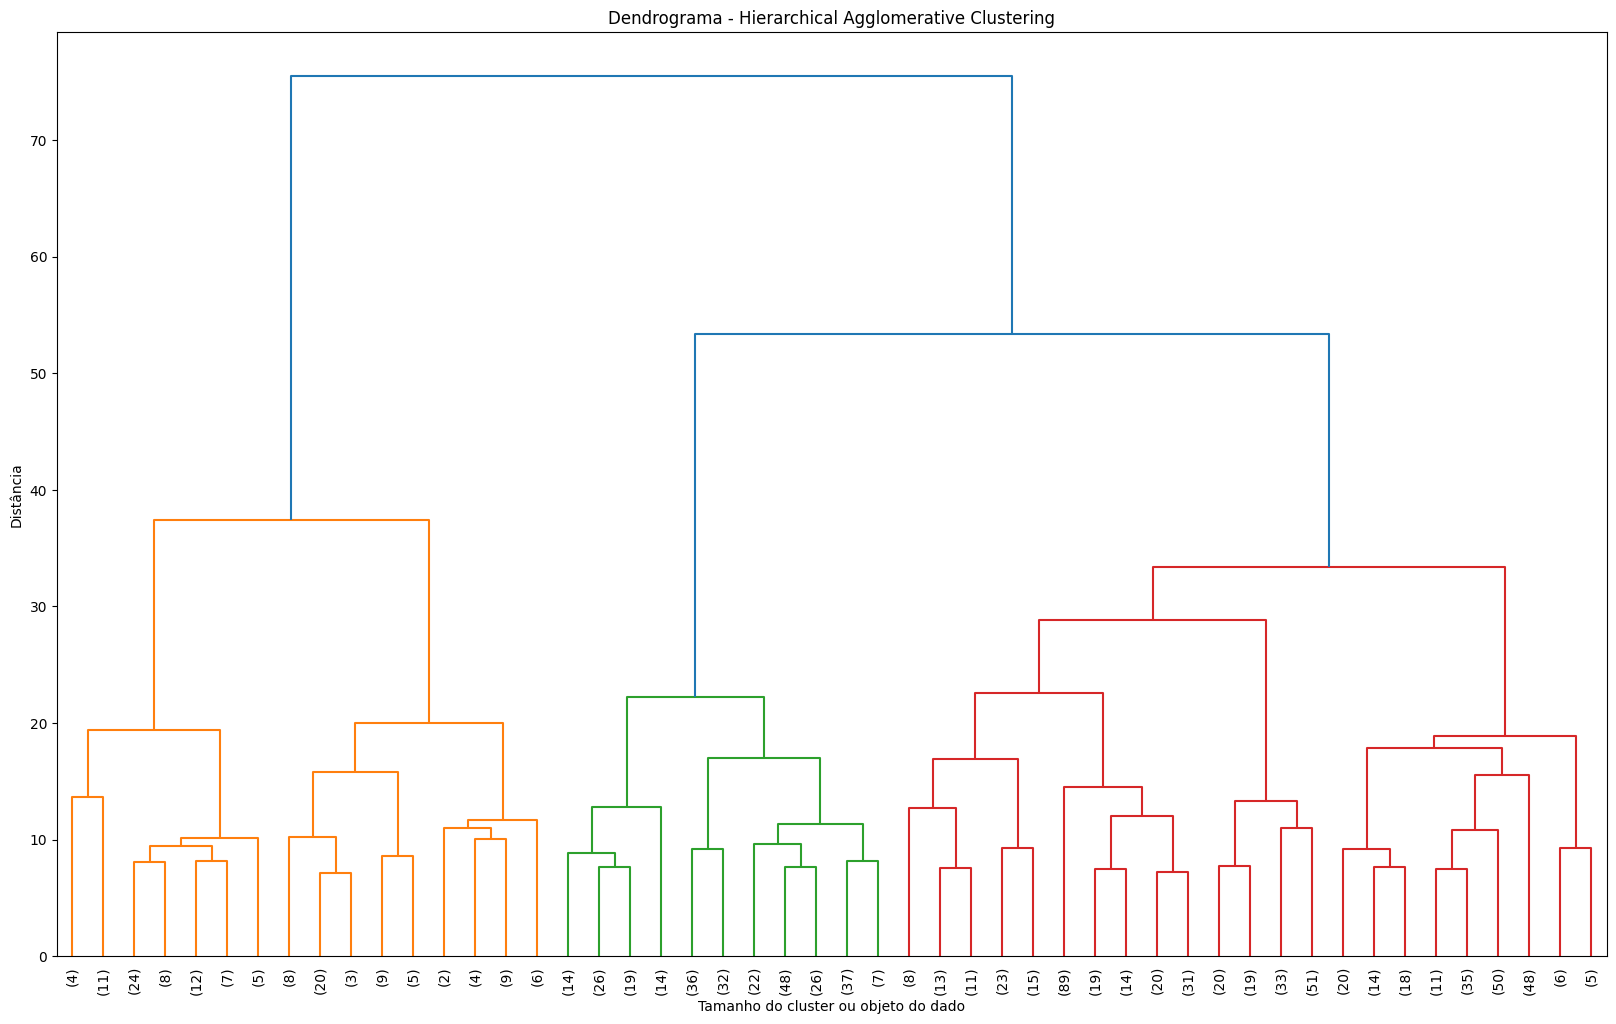

In [53]:
# Mostrar dendrograma
plt.figure(figsize=(20, 12))
dendrogram(modelo_de, truncate_mode='lastp', p=50, leaf_rotation=90, leaf_font_size=10, labels=df_laptops['cluster'].values)
plt.title('Dendrograma - Hierarchical Agglomerative Clustering')
plt.xlabel('Tamanho do cluster ou objeto do dado')
plt.ylabel('Distância')
plt.show()

In [56]:
# Cortar o dendograma para obter os clusters
clusters_de_scipy = cut_tree(modelo_de, height=32)
len(np.unique(clusters_de_scipy))

5

In [59]:
# Cruzamento entre brand e price, apresentando os clusters
px.scatter(df_laptops, x='cluster', y='price', color='brand')

In [60]:
# Cruzamento entre brand e price, apresentando os clusters
px.scatter(df_laptops, x='brand', y='price', color='cluster')

In [61]:
# Cruzamento entre brand e rating, apresentando os clusters
px.scatter(df_laptops, x='brand', y='rating', color='cluster')

In [62]:
# Cruzamento entre brand e rating, apresentando os clusters
px.scatter(df_laptops, x='cluster', y='rating', color='brand')

In [63]:
# Distribuição da variável cluster
percentual_cluster = df_laptops.value_counts('cluster') / len(df_laptops) * 100
px.bar(percentual_cluster, color=percentual_cluster.index)

In [64]:
# Distribuição da variável cluster
quantidade_cluster = df_laptops.value_counts('cluster')
px.bar(quantidade_cluster, color=quantidade_cluster.index)

### Salvar o modelo, preprocessor e CSV Atualizado

In [66]:
# Salvar modelo e pré-processador
import joblib

# Salvar o modelo de clusterização
joblib.dump(best_model, './modelo_clusterizacao_laptops.pkl')

# Salvar o pré-processador
joblib.dump(preprocessor, './preprocessor_clusterizacao_laptops.pkl')

['./preprocessor_clusterizacao_laptops.pkl']

In [67]:
# Salvar CSV atualizado com os clusters
df_laptops.to_csv('./dataset/clusterizacao_laptops.csv', index=False)